# Playbook for VAEs

## Prerequisites

Getting startet with the Medmnist data set: [link](https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb)

install with `!pip install medmnist`

## Imports

In [4]:
import torch
import torch.nn as nn

from tqdm import tqdm

from IPython.display import HTML

from utils import plot_real_vs_constructed 
from utils import load_dataset
from utils import plot_generated
from utils import modify_latent
from utils import generate_gif

/home/ruben/anaconda3/envs/cv1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data set loading

Uncomment different `data_flag` to load the different models

For the organ data set there is the possibility to combine three different organ data sets to get more data to train or test on

In [5]:
# data_flag = 'pathmnist'
data_flag = 'bloodmnist'
# data_flag = 'organamnist'
train_dataset, test_dataset, train_loader,_, _ = load_dataset(data_flag, 64, True)
# data_flag = 'organcmnist'
# train_dataset_2, test_dataset_2, train_loader_2,_, _ = load_dataset(data_flag, 64, True)
# data_flag = 'organsmnist'
# train_dataset_3, test_dataset_3, train_loader_3,_, _ = load_dataset(data_flag, 64, True)

# train_dataset = torch.utils.data.ConcatDataset([train_dataset, train_dataset_2, train_dataset_3])
# test_dataset = torch.utils.data.ConcatDataset([test_dataset, test_dataset_2, test_dataset_2])
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)


Using downloaded and verified file: /home/ruben/.medmnist/organamnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organamnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organamnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/organsmnist.npz


## $\beta$-VAE

Here are the sources used to create this $\beta$-VAE:
- [Paper: Understanding disentangling in β-VAE](https://arxiv.org/pdf/1804.03599.pdf)               
- [Paper: Variations in Variational Autoencoders - A Comparative Evaluation](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9171997)
- [GitHub: 1Konny](https://github.com/1Konny/Beta-VAE)
- [GitHub: AntixK](https://github.com/AntixK/PyTorch-VAE/blob/master/models/beta_vae.py)
- [Blog: Variational Autoencoder Demystified With PyTorch Implementation.](https://towardsdatascience.com/variational-autoencoder-demystified-with-pytorch-implementation-3a06bee395ed)

### Initializing

In [6]:
from beta_conv_vae import VariationalAutoencoder

latent_dims = 128 
channels = 3
model="beta-vae"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

vae = VariationalAutoencoder(latent_dims, mode="beta_vae", channels=channels).to(device) # GPU

### Training Section

To start training uncomment. 

All three models of the $\beta$-VAE are trained with 
- 50 epochs with a learning rate of $0.001$; 
- 30 epochs with a learning rate of $0.0001$; 
- 20 epoch with a learning rate of $0.00001$. 

In total the models are trained 100 epochs.

In [7]:
# vae.train(train_loader, lr=0.001, epochs=50, device=device)
# vae.train(train_loader, lr=0.0001, epochs=30, device=device)
# vae.train(train_loader, lr=0.00001, epochs=20, device=device)

Save the model to a path:

In [22]:
# vae.save_to_file(path="./models/organ_beta_v2")

### Visualizations of Results

Load model you want to visualize:

In [ ]:
vae.load_from_file(path="./models/blood_beta_v7")

Generate plots of:
- Test imgaes vs generated images
- completely random generated
- plot of latent modified images
- GIF of latent modification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.046607088297605515


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


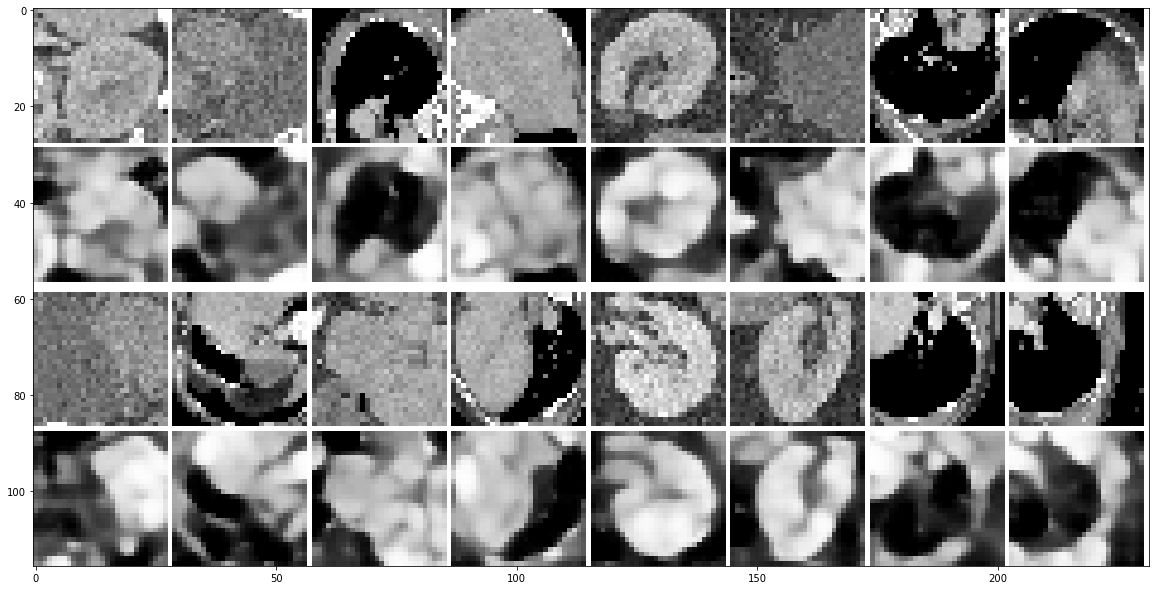

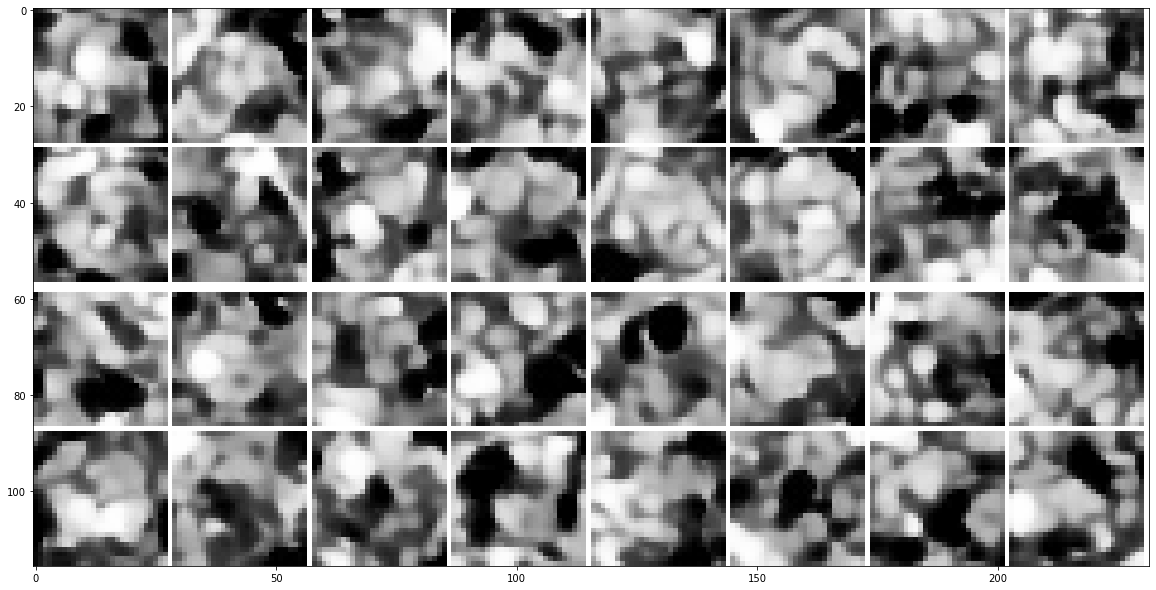

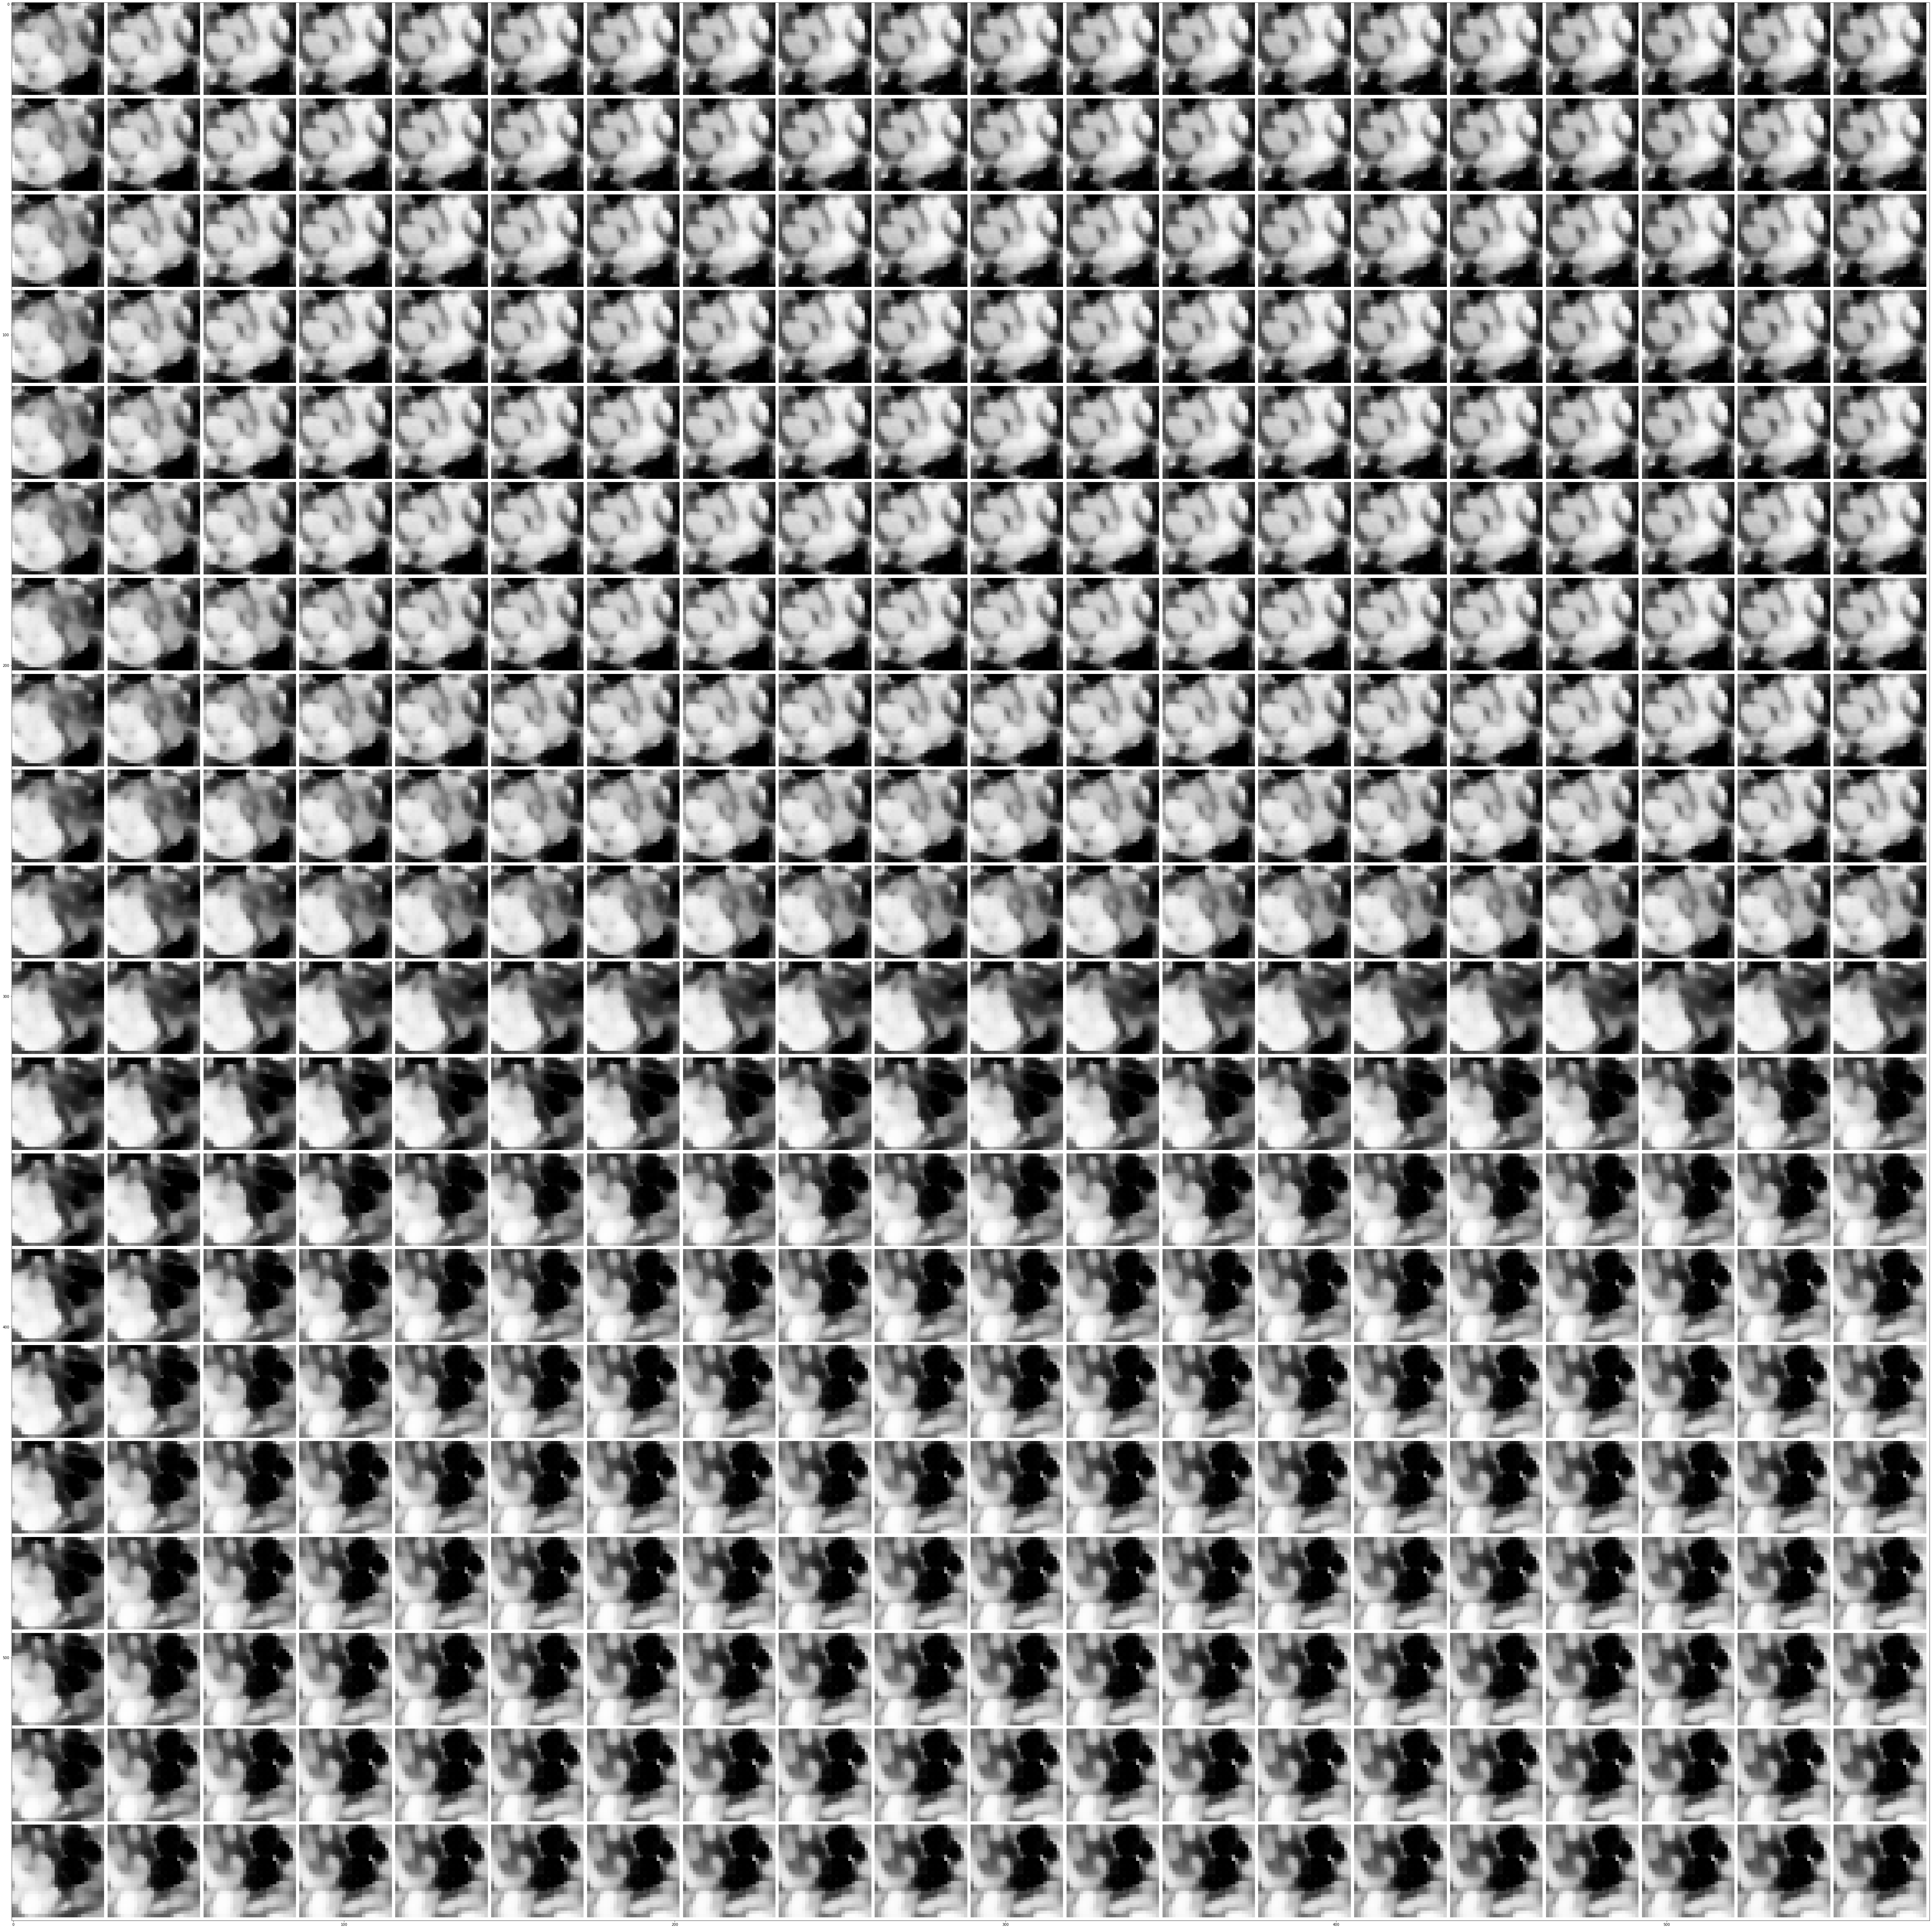

In [21]:
_ = plot_real_vs_constructed(vae, test_dataset, device, model=model)
_ = plot_generated(vae, device, u_bound=2.64, l_bound=-2.64)
_ = modify_latent(vae, test_dataset, img_nr=8, device=device, model=model)

In [12]:
t = generate_gif(vae, test_dataset, img_nr=0, device=device, model=model)

HTML(f'''
<img height="300" id="picture" src="data:image/gif;base64,{t}">
''')

### Exploration of the latent space

In [13]:
avg_min = 0
avg_max = 0
avg_mean = 0
for img, _ in tqdm(test_dataset):
    t_img = img[None,:,:,:].to(device)
    lat = vae.encoder.forward(t_img)
    avg_min +=  (lat.min().item() / len(test_dataset))
    avg_max += (lat.max().item() / len(test_dataset))
    avg_mean += (lat.mean().item() / len(test_dataset))

print("mean:",avg_mean, "max:", avg_max, "min:", avg_min)

100%|██████████| 34314/34314 [01:09<00:00, 496.12it/s]

mean: -0.007886061265780685 max: 2.6442938312968924 min: -2.6450330265829884


## VQ-VAE

Here are the sources used to create this VQ-VAE:
- [Paper: Neural Discrete Representation Learning](https://arxiv.org/abs/1711.00937)
- [GitHub: zalandoresearch](https://github.com/zalandoresearch/pytorch-vq-vae)
- [GitHub: ritheshkumar95](https://github.com/ritheshkumar95/pytorch-vqvae)

### Initializing

In [ ]:
from vq_vae_model import VariationalAutoencoder

latent_dims = 128 
channels = 3
model="vq-vae"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

vae = VariationalAutoencoder(num_hiddens=latent_dims, num_residual_layers=2, num_residual_hiddens=32, \
    num_embeddings=512, embedding_dim=64, commitment_cost=0.25, decay=0.99, \
        input_channel=channels,output_channel=channels).to(device)

### Training Section

Uncomment to start training.

Each model was trained 100 epochs with a learning rate of $0.0001$.

In [ ]:
# vae.train(train_loader, lr=0.0001, epochs=100, device=device)

Save the model to a path:

In [ ]:
# vae.save_to_file(path="./models/bloodmnist_epochs_100.tar")

### Visualizing the Results

Load model you want to visualize:

In [ ]:
vae.load_from_file(path="./models/bloodmnist_epochs_100.tar")

Generate plots of:
- Test imgaes vs generated images
- completely random generated
- plot of latent modified images
- GIF of latent modification

In [ ]:
_ = plot_real_vs_constructed(vae, test_dataset, device, model=model)
_ = plot_generated(vae, device, u_bound=2.64, l_bound=-2.64)
_ = modify_latent(vae, test_dataset, img_nr=8, device=device, model=model)

In [ ]:
t = generate_gif(vae, test_dataset, img_nr=0, device=device, model=model)

HTML(f'''
<img height="300" id="picture" src="data:image/gif;base64,{t}">
''')

### Exploring the latent space

In [ ]:
avg_min = 0
avg_max = 0
avg_mean = 0
for img, _ in tqdm(test_dataset):
    t_img = img[None,:,:,:].to(device)
    lat = vae.encoder.forward(t_img)
    avg_min +=  (lat.min().item() / len(test_dataset))
    avg_max += (lat.max().item() / len(test_dataset))
    avg_mean += (lat.mean().item() / len(test_dataset))

print("mean:",avg_mean, "max:", avg_max, "min:", avg_min)

# Experiments for Convolutions e.g number of layers or kernel sizes 

In [14]:
i = torch.randn((3, 28, 28))
cov1 = nn.Conv2d(3, 12, 3, stride=2)
cov2 = nn.Conv2d(12, 24, 3, stride=2)
cov2_5 = nn.Conv2d(24, 48, 3, stride=2)
m1 = nn.MaxPool2d(2)
m2 = nn.MaxUnpool2d(3)
lin1 = nn.Linear(192,192)
cov3 = nn.ConvTranspose2d(48,24,3, stride=2)#, output_padding=1)
cov4 = nn.ConvTranspose2d(24,12,4, stride=2)#, output_padding=1)
cov5 = nn.ConvTranspose2d(12,4,4, stride=2)#, output_padding=1)
cov6 = nn.ConvTranspose2d(4,3,3, stride=2)#, output_padding=1)
cov7 = nn.Conv2d(3,3,1, stride=2, padding=1)#, output_padding=1)
print(i.flatten().shape, i.shape)
x = cov1(i)
x = cov2(x)
x = cov2_5(x)
# x = m1(x)
print(x.flatten().shape, x.shape)
x = lin1(x.flatten())
x = x.reshape(48,2,2)
x = cov3(x)
x = cov4(x)
# x = cov4_5(x)
x = cov5(x)
x = cov6(x)
x = cov7(x)
# x = m2(x)
print(x.flatten().shape, x.shape)


torch.Size([2352]) torch.Size([3, 28, 28])
torch.Size([192]) torch.Size([48, 2, 2])
torch.Size([2352]) torch.Size([3, 28, 28])


In [15]:
tmp = torch.randn((1, 1, 28, 28))
modules = []
hidden_dims = [32, 64, 128, 256] # 512
# hidden_dims = [28, 56, 112, 224]
# hidden_dims = [28, 56, 112]

in_channels = 1
for h_dim in hidden_dims:
    modules.append(
        nn.Sequential(
            nn.Conv2d(in_channels, out_channels=h_dim,
                        kernel_size= 3, stride= 2, padding  = 1),
            nn.BatchNorm2d(h_dim),
            nn.LeakyReLU())
    )
    in_channels = h_dim
encoder = nn.Sequential(*modules)

hidden_dims.reverse()
modules = []
for i in range(len(hidden_dims) - 1):
    modules.append(
        nn.Sequential(
            nn.ConvTranspose2d(hidden_dims[i],
                                hidden_dims[i + 1],
                                kernel_size=3,
                                stride = 2,
                                padding=1,
                                output_padding=1),
            nn.BatchNorm2d(hidden_dims[i + 1]),
            nn.LeakyReLU())
    )
decoder = nn.Sequential(*modules)

final_layer = nn.Sequential(
    nn.ConvTranspose2d(hidden_dims[-1],
                        hidden_dims[-1],
                        kernel_size=2,
                        stride=2,
                        padding=1),
    nn.BatchNorm2d(hidden_dims[-1]),
    nn.LeakyReLU(),
    nn.Conv2d(hidden_dims[-1], out_channels= 1,
                kernel_size= 3),
    nn.Tanh())

print(tmp.flatten().shape, tmp.shape)
x = encoder(tmp)
print(x.flatten().shape, x.shape)
print(torch.flatten(x, start_dim=1).shape)
x = decoder(x)
x = final_layer(x)
print(x.flatten().shape, x.shape)

torch.Size([784]) torch.Size([1, 1, 28, 28])
torch.Size([1024]) torch.Size([1, 256, 2, 2])
torch.Size([1, 1024])
torch.Size([784]) torch.Size([1, 1, 28, 28])
